Load the datasets given (boston dataset). Create a simple linear regression model using only first feature. Print the accuracy (mse) and plot the results similar to the example found below (you will see this example in the class):

 https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Create a Multiple Linear Regression (MLR) model using all the 13 features. Print the accuracy.

Create 13 MLR regression models by incrementally changing the number of features i.e Plot mse vs # features curve. Write conclusions.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
boston = pd.read_csv('boston.csv')
boston_data = np.array(boston[boston.columns[:-1]])
boston_target = np.array(boston[boston.columns[-1]])
x_train, x_test, y_train, y_test = train_test_split(boston_data, boston_target, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


Mean squared error: 85.12881073669183


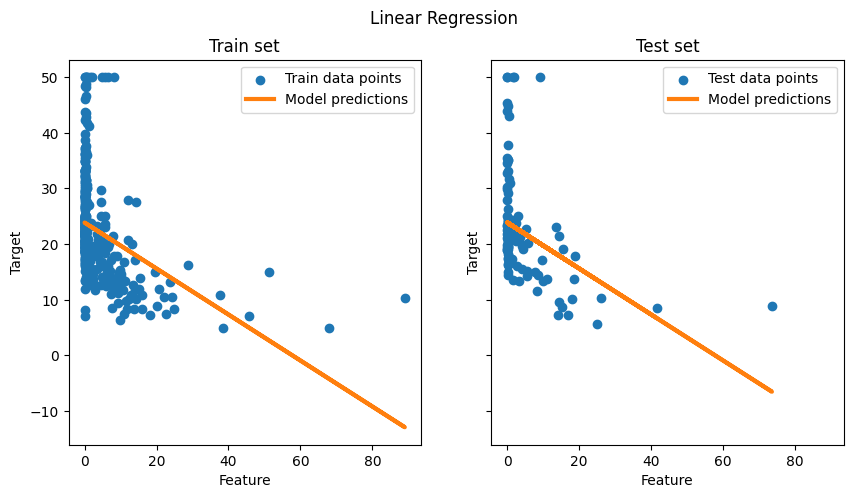

In [ ]:
# Create a simple Linear Regression model using only the first feature. Print the accuracy (mse) and
# plot the results similar to the example found below (you will see this example in the class):
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
lr = LinearRegression()
lr.fit(x_train[:,:1], y_train)
y_pred = lr.predict(x_test[:,:1])
print("Mean squared error:", mean_squared_error(y_test, y_pred))

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(x_train[:,:1], y_train, label="Train data points")
ax[0].plot(
    x_train[:,:1],
    lr.predict(x_train[:,:1]),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(x_test[:,:1], y_test, label="Test data points")
ax[1].plot(x_test[:,:1], y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

In [ ]:
# Create a Multiple Linear Regression (MLR) model using all the 13 features. Print the accuracy
# (mse) and compare it that obtained in (i).
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test, y_pred))

Mean squared error: 27.393249173776038


Using all 13 features reduce mse by 58

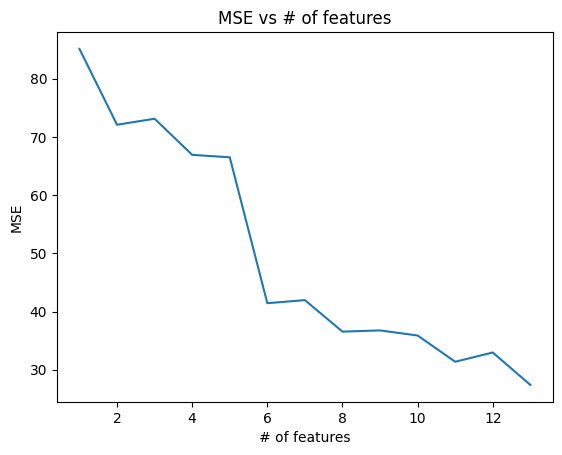

In [ ]:
# Create 13 MLR regression models by incrementally changing the number of features i.e
# Plot mse vs #features curve.
# Write conclusions.
mses = []
model = LinearRegression()
for i in range(1, 14):
    y_pred = model.fit(x_train[:, :i], y_train).predict(x_test[:, :i])
    mses.append(mean_squared_error(y_test, y_pred))

plt.plot(range(1, 14), mses)
plt.xlabel("# of features")
plt.ylabel("MSE")
plt.title("MSE vs # of features")
plt.show()

Adding more features reduce the mean square error each time in exchange for a bit more complexity. We can see from the graph that some features are more important than others by noticing how steep the line is between one feature and the next. We can also see that some features actually increase the loss.